In [16]:
from ivp_utils import *
import numpy as np

Very coarse mesh and no measurement noise


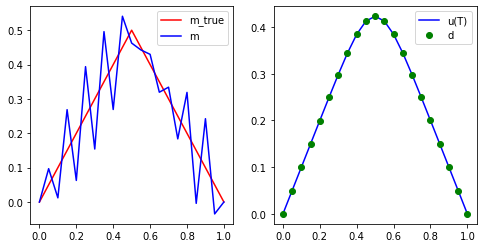

In [17]:
# ===== parameters =====
T = 1.0
L = 1.0
k = 0.005

print("Very coarse mesh and no measurement noise")
nx = 20
nt = 100

noise_std_dev = 1.e-4

h = L/float(nx)
dt = T/float(nt)
# ======================

# generate solution and u_sol at t=T
x = np.linspace(0.+h, L-h, nx-1) #place nx-1 equispace point in the interior of [0,L] interval
m_true = 0.5 - np.abs(x-0.5)
u_true =solveFwd(m_true, k, h, dt, nx-1, nt)

# DATA
d = u_true + noise_std_dev*np.random.randn(u_true.shape[0])
# solution from the inverse problem
m = naiveSolveInv(d, k, h, dt, nx-1, nt)


## Plotting the solutions
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
# ploting the initial solution
plot(m_true, L, nx, "-r", label = 'm_true')
plot(m, L, nx, "-b", label = 'm')
plt.legend()
plt.subplot(1,2,2)
# plotting the solution after time steps
plot(u_true, L, nx, "-b", label = 'u(T)')
plot(d, L, nx, "og", label = 'd')
plt.legend()
plt.show()


In [19]:
A = assembleMatrix(k, h, dt, nx-1)

In [22]:
np.linalg.cond(sp.csr_matrix(A).toarray())

1.0789761741373278

Fine mesh and small measurement noise


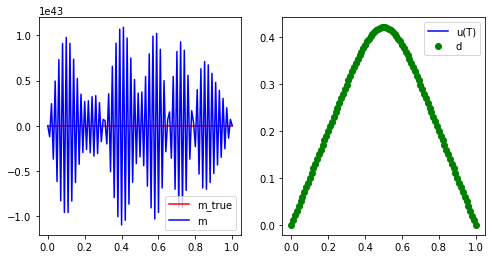

In [23]:
print("Fine mesh and small measurement noise")
nx = 100
nt = 100

noise_std_dev = 1.e-4

h = L/float(nx)
dt = T/float(nt)

x = np.linspace(0.+h, L-h, nx-1) #place nx-1 equispace point in the interior of [0,L] interval
m_true = 0.5 - np.abs(x-0.5)
u_true = solveFwd(m_true, k, h, dt, nx-1, nt)

d = u_true + noise_std_dev*np.random.randn(u_true.shape[0])

m = naiveSolveInv(d, k, h, dt, nx-1, nt)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot(m_true, L, nx, "-r", label = 'm_true')
plot(m, L, nx, "-b", label = 'm')
plt.legend()
plt.subplot(1,2,2)
plot(u_true, L, nx, "-b", label = 'u(T)')
plot(d, L, nx, "og", label = 'd')
plt.legend()
plt.show()

In [24]:
A = assembleMatrix(k, h, dt, nx-1)

In [25]:
np.linalg.cond(sp.csr_matrix(A).toarray())

2.9980272149132783

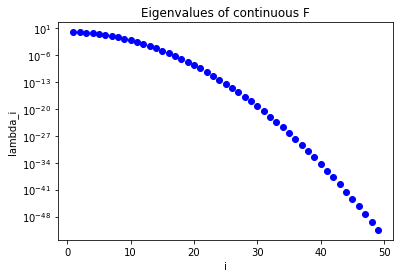

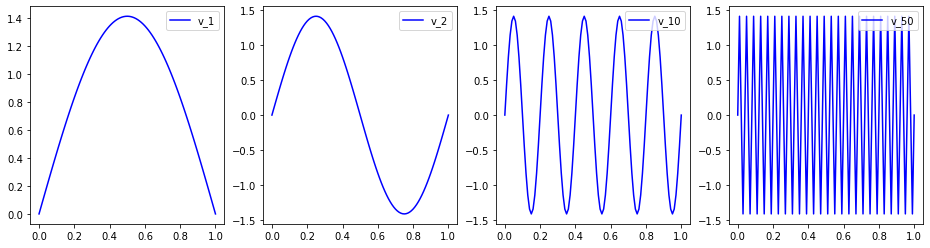

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

T = 1.0
L = 1.0
k = 0.005

#nx = 20
#h = L/float(nx)
#x = np.linspace(0.+h, L-h, nx-1) #place nx-1 equispace point in the interior of [0,L] interval

i = np.arange(1,50)
lambdas = np.exp(-k*T*np.power(np.pi/L*i,2))

v1  = np.power(2/L,0.5)*np.sin(1*np.pi/L*x)
v2  = np.power(2/L,0.5)*np.sin(2*np.pi/L*x)
v10 = np.power(2/L,0.5)*np.sin(10*np.pi/L*x)
v50 = np.power(2/L,0.5)*np.sin(50*np.pi/L*x)

plt.semilogy(i, lambdas, 'ob')
plt.xlabel('i')
plt.ylabel('lambda_i')
plt.title("Eigenvalues of continuous F")
plt.show()

plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
plot(v1, L, nx, "-b", label = 'v_1')
plt.legend()
plt.subplot(1,4,2)
plot(v2, L, nx, "-b", label = 'v_2')
plt.legend()
plt.subplot(1,4,3)
plot(v10, L, nx, "-b", label = 'v_10')
plt.legend()
plt.subplot(1,4,4)
plot(v50, L, nx, "-b", label = 'v_50')
plt.legend()
plt.show()

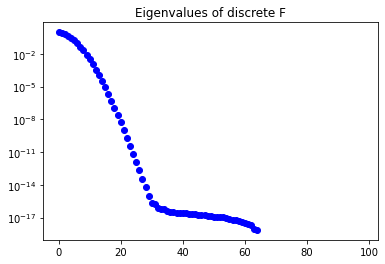

In [5]:
## Compute eigenvector and eigenvalues of the discretized forward operator
lmbda, U = computeEigendecomposition(k, h, dt, nx-1, nt)

plt.semilogy(lmbda, 'ob')
plt.title("Eigenvalues of discrete F")
plt.show()

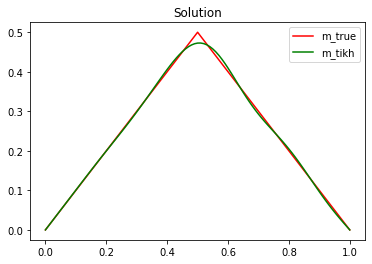

In [7]:
## Setup the problem
T = 1.0
L = 1.0
k = 0.005

nx = 100
nt = 100

noise_std_dev = 1e-3

h = L/float(nx)
dt = T/float(nt)

## Compute the data d by solving the forward model
x = np.linspace(0.+h, L-h, nx-1)
#m_true = np.power(.5,-36)*np.power(x,20)*np.power(1. - x, 16)
m_true = 0.5 - np.abs(x-0.5)
u_true = solveFwd(m_true, k, h, dt, nx-1, nt)
d = u_true + noise_std_dev*np.random.randn(u_true.shape[0])

alpha = 1e-3

F = assembleF(k, h, dt, nx-1, nt)
m_alpha = solveTikhonov(d, F, alpha)

plot(m_true, L, nx, "-r", label = 'm_true')
plot(m_alpha, L, nx, "-g", label = 'm_tikh')
plt.title("Solution")
plt.legend()
plt.show()

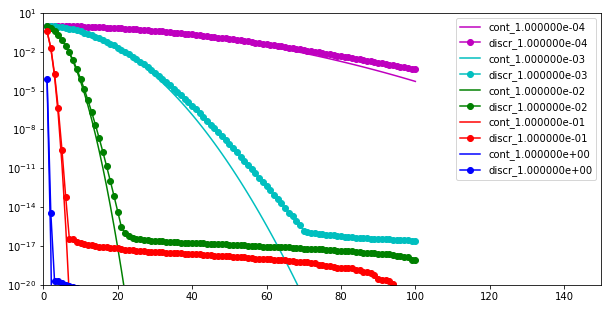

In [8]:
T = 1.
L = 1.
nx = 200
nt = 100

# Plot only the first 100 eigenvalues
i = np.arange(1,101)

colors = ['b', 'r', 'g', 'c', 'm']
plt.figure(figsize=(10,5))
for k in [1e-4, 1e-3, 1e-2, 1e-1, 1.]:
    lambdas_continuous  = np.exp(-k*T*np.power(np.pi/L*i,2))
    lambdas_discrete, U = computeEigendecomposition(k, L/float(nx), T/float(nt), nx-1, nt)
    lambdas_discrete    = lambdas_discrete[0:len(i)]
    c = colors.pop()
    plt.semilogy(i, lambdas_continuous, '-'+c, label = "cont_{0:e}".format(k))
    plt.semilogy(i, lambdas_discrete, '-o'+c, label = "discr_{0:e}".format(k))

plt.xlim([0, 150])
plt.ylim([1e-20, 10.])
plt.legend()
plt.show()

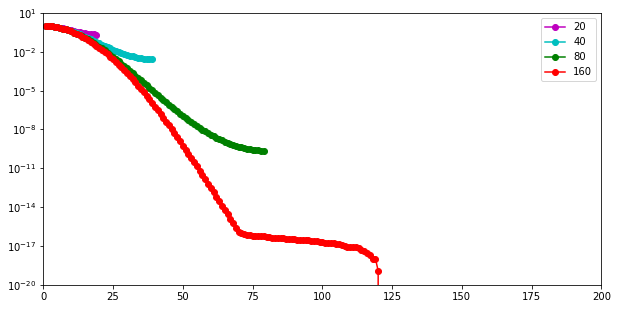

In [9]:
T = 0.1
L = 1.
k = 0.01

colors = ['b', 'r', 'g', 'c', 'm']
plt.figure(figsize=(10,5))
for (nx,nt) in [(20,20), (40,40), (80,80), (160,160)]:
    lambdas_discrete, U = computeEigendecomposition(k, L/float(nx), T/float(nt), nx-1, nt)
    c = colors.pop()
    plt.semilogy(np.arange(1, nx), lambdas_discrete, '-o'+c, label = "{0:d}".format(nx))

plt.xlim([0, 200])
plt.ylim([1e-20, 10.])
plt.legend()
plt.show()

In [12]:
x = np.arange(1,nx, dtype=np.float64)*h
m_true = np.maximum( np.zeros_like(x), 1. - np.abs(1. - 4.*x)) \
         + 100.*np.power(x,10)*np.power(1.-x,2)

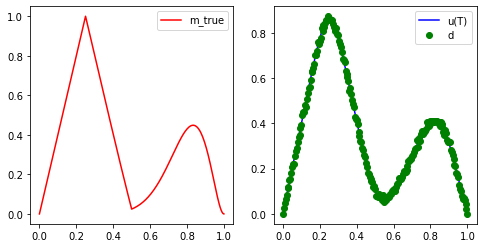

In [15]:
L = 1.
T = 0.1
k = 0.01

nx = 200
nt = 100

noise_std_dev = 1e-2

h = L/float(nx)
dt = T/float(nt)

## Compute the data d by solving the forward model
x = np.linspace(0.+h, L-h, nx-1)
m_true = np.maximum( np.zeros_like(x), 1. - np.abs(1. - 4.*x)) + 100.*np.power(x,10)*np.power(1.-x,2)
u_true = solveFwd(m_true, k, h, dt, nx-1, nt)
d = u_true + noise_std_dev*np.random.randn(u_true.shape[0])

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot(m_true, L, nx, "-r", label = 'm_true')
plt.legend()
plt.subplot(1,2,2)
plot(u_true, L, nx, "-b", label = 'u(T)')
plot(d, L, nx, "og", label = 'd')
plt.legend()
plt.show()

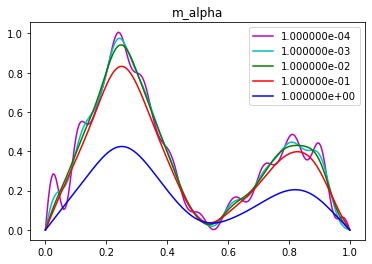

In [17]:
F = assembleF(k, h, dt, nx-1, nt)

colors = ['b', 'r', 'g', 'c', 'm']
for alpha in [1e-4, 1e-3, 1e-2, 1e-1, 1.]:
    m_alpha = solveTikhonov(d, F, alpha)
    plot(m_alpha, L, nx, "-"+colors.pop(), label = '{0:e}'.format(alpha))

plt.legend()
plt.title("m_alpha")
plt.show()

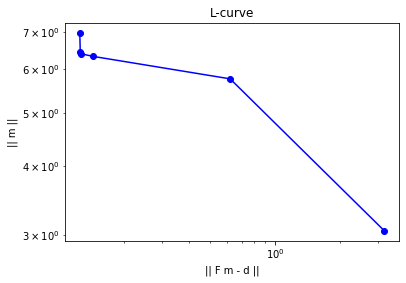

In [18]:
norm_m = [] #norm of parameter
norm_r = [] #norm of misfit (residual)
for alpha in [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.]:
    m_alpha = solveTikhonov(d, F, alpha)
    norm_m.append( np.sqrt( np.dot(m_alpha,m_alpha) ) )
    u_alpha = solveFwd(m_alpha, k, h, dt, nx-1, nt)
    norm_r.append( np.sqrt( np.dot(d-u_alpha,d-u_alpha) ) )
    
plt.loglog(norm_r, norm_m, "-ob")
plt.xlabel("|| F m - d ||")
plt.ylabel("|| m ||")
plt.title("L-curve")
plt.show()

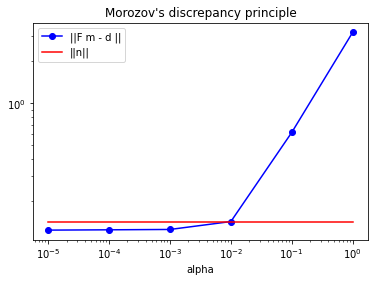

In [20]:
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.]
norm_r = [] #norm of misfit (residual)
for alpha in [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.]:
    m_alpha = solveTikhonov(d, F, alpha)
    u_alpha = solveFwd(m_alpha, k, h, dt, nx-1, nt)
    norm_r.append( np.sqrt( np.dot(d-u_alpha,d-u_alpha) ) )
    
plt.loglog(alphas, norm_r, "-ob", label="||F m - d ||")
plt.loglog(alphas, [noise_std_dev*np.sqrt(nx-1)]*len(alphas), "-r", label="||n||")
plt.xlabel("alpha")
plt.legend()
plt.title("Morozov's discrepancy principle")
plt.show()

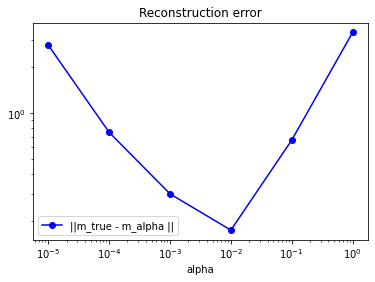

In [22]:
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.]
err_m = [] #norm of misfit (residual)
for alpha in alphas:
    m_alpha = solveTikhonov(d, F, alpha)
    err_m.append( np.sqrt( np.dot(m_true-m_alpha,m_true-m_alpha) ) )
    
plt.loglog(alphas, err_m, "-ob", label="||m_true - m_alpha ||")
plt.xlabel("alpha")
plt.legend()
plt.title("Reconstruction error")
plt.show()

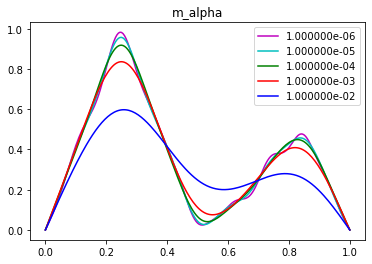

In [24]:
L = 1.
T = 0.1
k = 0.01

nx = 200
nt = 100

noise_std_dev = 1e-2

h = L/float(nx)
dt = T/float(nt)

## Compute the data d by solving the forward model
x = np.linspace(0.+h, L-h, nx-1)
m_true = np.maximum( np.zeros_like(x), 1. - np.abs(1. - 4.*x)) + 100.*np.power(x,10)*np.power(1.-x,2)
u_true = solveFwd(m_true, k, h, dt, nx-1, nt)
d = u_true + noise_std_dev*np.random.randn(u_true.shape[0])

# Assemble the regularization matrix corresponding to the laplacian of m
R = -np.diag(np.ones(d.shape[0]-1), -1) + 2*np.diag(np.ones(d.shape[0]),0) - np.diag(np.ones(d.shape[0]-1), 1)
R*= h**(-2)

F = assembleF(k, h, dt, nx-1, nt)

def solveTikhonov2(d, F, R, alpha): 
    H = np.dot( F.transpose(), F) + alpha*R
    rhs = np.dot( F.transpose(), d)
    return np.linalg.solve(H, rhs)

colors = ['b', 'r', 'g', 'c', 'm']
for alpha in [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]:
    m_alpha = solveTikhonov2(d, F, R, alpha)
    plot(m_alpha, L, nx, "-"+colors.pop(), label = '{0:e}'.format(alpha))

plt.legend()
plt.title("m_alpha")
plt.show()

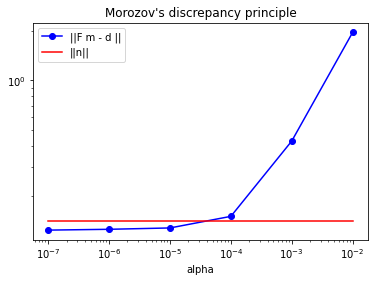

In [26]:
alphas = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
norm_r = [] #norm of misfit (residual)
for alpha in alphas:
    m_alpha = solveTikhonov2(d, F, R, alpha)
    u_alpha = solveFwd(m_alpha, k, h, dt, nx-1, nt)
    norm_r.append( np.sqrt( np.dot(d-u_alpha,d-u_alpha) ) )
    
plt.loglog(alphas, norm_r, "-ob", label="||F m - d ||")
plt.loglog(alphas, [noise_std_dev*np.sqrt(nx-1)]*len(alphas), "-r", label="||n||")
plt.xlabel("alpha")
plt.legend()
plt.title("Morozov's discrepancy principle")
plt.show()

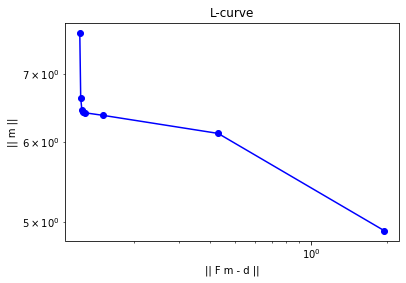

In [27]:
norm_m = [] #norm of parameter
norm_r = [] #norm of misfit (residual)
for alpha in [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]:
    m_alpha = solveTikhonov2(d, F, R, alpha)
    norm_m.append( np.sqrt( np.dot(m_alpha,m_alpha) ) )
    u_alpha = solveFwd(m_alpha, k, h, dt, nx-1, nt)
    norm_r.append( np.sqrt( np.dot(d-u_alpha,d-u_alpha) ) )
    
plt.loglog(norm_r, norm_m, "-ob")
plt.xlabel("|| F m - d ||")
plt.ylabel("|| m ||")
plt.title("L-curve")
plt.show()